### Import Libraries

In [831]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from itertools import combinations
from tqdm import tqdm

### Analyse the dataset

In [832]:
df = pd.read_csv('../Datasets/train.csv')
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [834]:
df.set_index('Trip_ID', inplace=True)
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [835]:
null_values = df.isnull().sum()
print(null_values)

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64


### Analyse the Distribution of Features

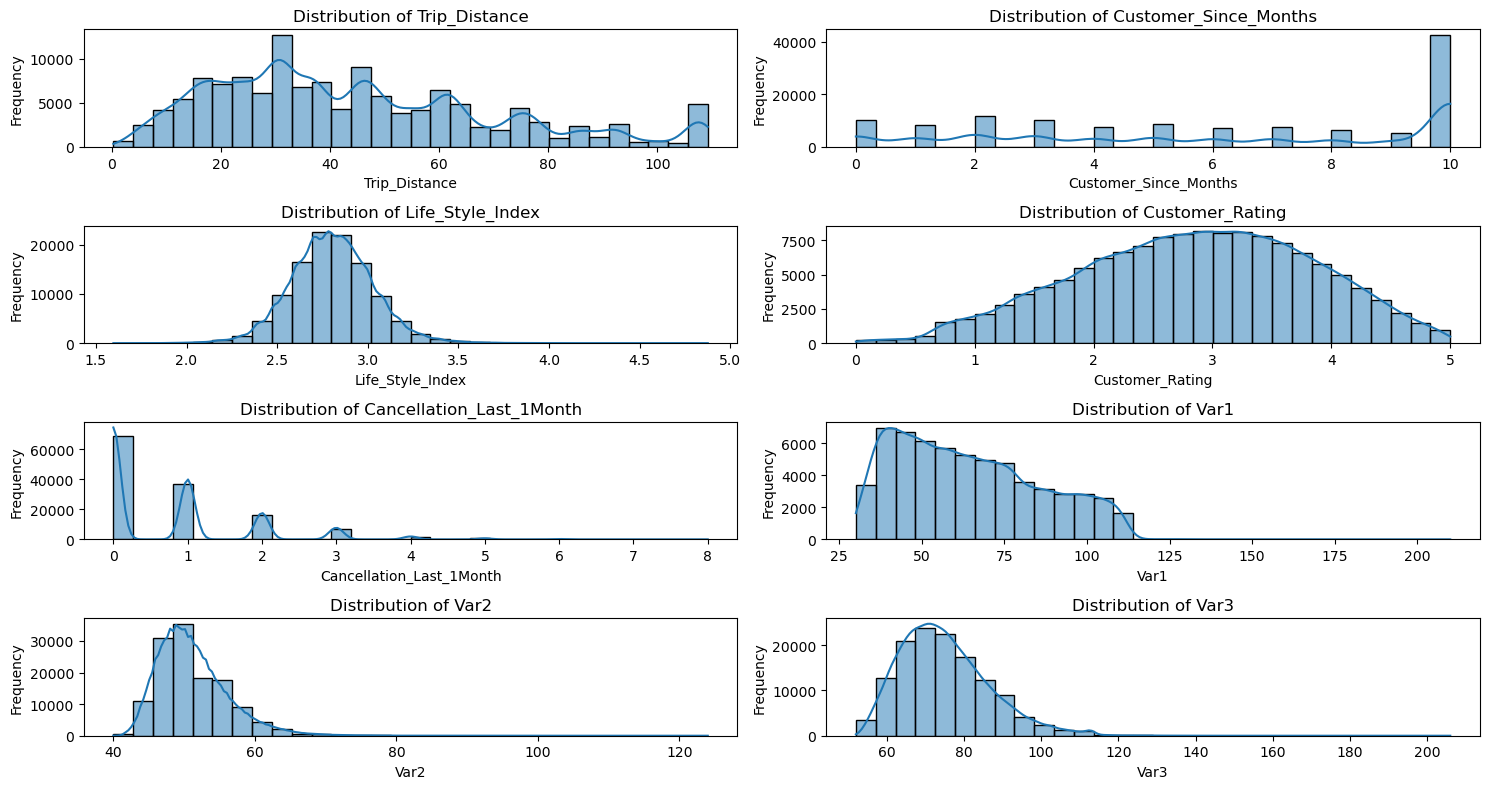

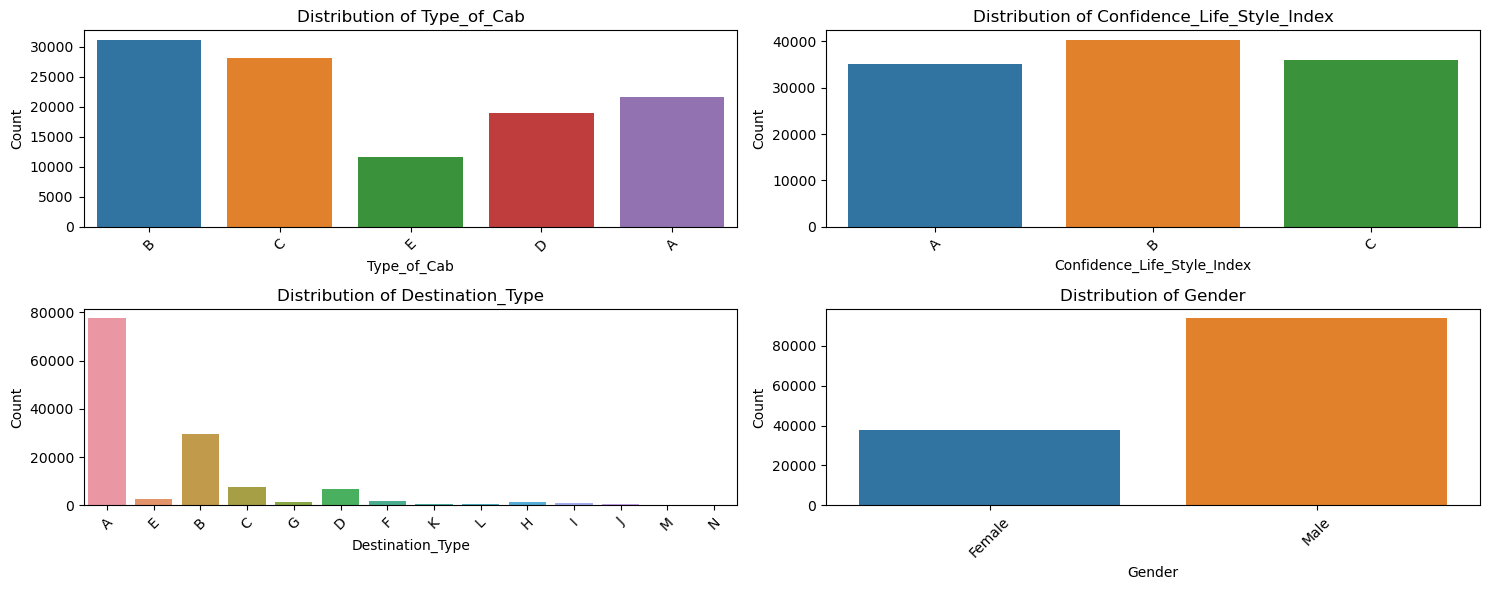

In [836]:
numerical_features = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating',
                      'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']

categorical_features = [
    'Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

### Handle Null Values

In [837]:
df['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [838]:
# Fill Null values in Type_of_Cab as Unknown
df['Type_of_Cab'].fillna('Unknown', inplace=True)
df['Type_of_Cab'].value_counts()

B          31136
C          28122
A          21569
Unknown    20210
D          18991
E          11634
Name: Type_of_Cab, dtype: int64

In [839]:
df['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [840]:
# Fill Null Values in Customer_Since_Months by Highest frequency value
df['Customer_Since_Months'].fillna(
    df['Customer_Since_Months'].mode()[0], inplace=True)
df['Customer_Since_Months'].value_counts()

10.0    48600
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [841]:
df['Confidence_Life_Style_Index'].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [842]:
df['Confidence_Life_Style_Index'].fillna('Unknown', inplace=True)
df['Confidence_Life_Style_Index'].value_counts()

B          40355
C          35967
A          35147
Unknown    20193
Name: Confidence_Life_Style_Index, dtype: int64

In [843]:
df['Life_Style_Index'].fillna(
    df['Life_Style_Index'].mean(), inplace=True)
df['Var1'].fillna(df['Var1'].mean(), inplace=True)

In [844]:
null_values = df.isnull().sum()
print(null_values)

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64


### Binning and Encoding

In [845]:
# Catagorized Cancellation_Last_1Month feature
bins = [0, 1, 2, 3, 8]
labels = ['None', 'Once', 'Twice', 'More_Than_Thrice']
df['Cancellation_Last_1Month'] = pd.cut(
    df['Cancellation_Last_1Month'], bins=bins, labels=labels, right=False)
df['Cancellation_Last_1Month'].value_counts()

None                68687
Once                36834
Twice               16223
More_Than_Thrice     9915
Name: Cancellation_Last_1Month, dtype: int64

In [846]:
categorical_features = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Cancellation_Last_1Month', 'Gender']
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,1,1.0,2.427690,0,0,3.90500,1,40.000000,46,60,0,2
T0005689461,29.47,1,10.0,2.782450,1,0,3.45000,1,38.000000,56,78,1,2
T0005689464,41.58,5,10.0,2.802064,3,4,3.50125,3,64.202698,56,77,1,2
T0005689465,61.56,2,10.0,2.802064,3,0,3.45375,1,64.202698,52,74,1,3
T0005689467,54.95,2,10.0,3.034530,1,0,3.40250,0,51.000000,49,102,1,2


In [847]:
df['Destination_Type'].value_counts()

0     77597
1     29555
2      7484
3      6588
4      2717
5      1950
6      1489
7      1260
8       813
9       695
10      680
11      643
13       98
12       93
Name: Destination_Type, dtype: int64

In [848]:
# bins = [0, 1, 2, 12]
# labels = [0,1,2]
# df['Destination_Type'] = pd.cut(
#     df['Destination_Type'], bins=bins, labels=labels, right=False)
# df['Destination_Type'].value_counts()

# df['Destination_Type'].value_counts()

In [849]:
# label_encoder = LabelEncoder()
# df_new = label_encoder.fit_transform(df['Destination_Type'])
# df.drop('Destination_Type', axis=1, inplace=True)
# df['Destination_Type'] = df_new
# df['Destination_Type'].value_counts()

In [850]:
label_encoder = LabelEncoder()
df['Destination_Type'] = label_encoder.fit_transform(df['Destination_Type'])

df['Destination_Type'].value_counts()

0     77597
1     29555
2      7484
3      6588
4      2717
5      1950
6      1489
7      1260
8       813
9       695
10      680
11      643
13       98
12       93
Name: Destination_Type, dtype: int64

In [851]:
bins = [0, 1, 2, 14]
labels = [0, 1, 2]

# Bin the values
df['Destination_Type'] = pd.cut(
    df['Destination_Type'], bins=bins, labels=labels, right=False)
# Print the value counts
print(df['Destination_Type'].value_counts())

0    77597
1    29555
2    24510
Name: Destination_Type, dtype: int64


In [852]:
# Convert Customer_Since_Months and Surge_Pricing_Type
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype(int)
df['Destination_Type'] = df['Destination_Type'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  int32  
 2   Customer_Since_Months        131662 non-null  int32  
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  int32  
 5   Destination_Type             131662 non-null  int32  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int32  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  int32  
 12  Surge_Pricing_Type           131662 non-null  in

In [853]:
df.describe()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,2.217337,6.195766,2.802064,1.312968,0.596793,2.849458,1.450958,64.202698,51.202800,75.099019,0.713190,2.155747
std,25.522882,1.650375,3.639259,0.207760,1.027455,0.782913,0.980675,0.802984,14.807523,4.986142,11.578278,0.452274,0.738164
min,0.310000,0.000000,0.000000,1.596380,0.000000,0.000000,0.001250,0.000000,30.000000,40.000000,52.000000,0.000000,1.000000
25%,24.580000,1.000000,3.000000,2.687952,0.000000,0.000000,2.152500,1.000000,64.000000,48.000000,67.000000,0.000000,2.000000
50%,38.200000,2.000000,7.000000,2.802064,1.000000,0.000000,2.895000,1.000000,64.202698,50.000000,74.000000,1.000000,2.000000
75%,60.730000,3.000000,10.000000,2.912815,2.000000,1.000000,3.582500,2.000000,64.202698,54.000000,82.000000,1.000000,3.000000
max,109.230000,5.000000,10.000000,4.875110,3.000000,2.000000,5.000000,4.000000,210.000000,124.000000,206.000000,1.000000,3.000000


### Normalization

In [854]:
trip_distance = df['Trip_Distance']
var1 = df['Var1']
var2 = df['Var2']
var3 = df['Var3']

# Reshape the data to a 2D array
trip_distance_reshaped = trip_distance.values.reshape(-1, 1)
var1_reshaped = var1.values.reshape(-1, 1)
var2_reshaped = var2.values.reshape(-1, 1)
var3_reshaped = var3.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

df.drop(['Trip_Distance', 'Var1', 'Var2', 'Var3'], axis=1, inplace=True)

df['Trip_Distance'] = scaler.fit_transform(trip_distance_reshaped)
df['Var1'] = scaler.fit_transform(var1_reshaped)
df['Var2'] = scaler.fit_transform(var2_reshaped)
df['Var3'] = scaler.fit_transform(var3_reshaped)

df.describe()

,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type,Trip_Distance,Var1,Var2,Var3
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,2.217337,6.195766,2.802064,1.312968,0.596793,2.849458,1.450958,0.713190,2.155747,4.029646,1.900150,1.333667,1.499936
std,1.650375,3.639259,0.207760,1.027455,0.782913,0.980675,0.802984,0.452274,0.738164,2.343269,0.822640,0.593588,0.751836
min,0.000000,0.000000,1.596380,0.000000,0.000000,0.001250,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.687952,0.000000,0.000000,2.152500,1.000000,0.000000,2.000000,2.228241,1.888889,0.952381,0.974026
50%,2.000000,7.000000,2.802064,1.000000,0.000000,2.895000,1.000000,1.000000,2.000000,3.478700,1.900150,1.190476,1.428571
75%,3.000000,10.000000,2.912815,2.000000,1.000000,3.582500,2.000000,1.000000,3.000000,5.547191,1.900150,1.666667,1.948052
max,5.000000,10.000000,4.875110,3.000000,2.000000,5.000000,4.000000,1.000000,3.000000,10.000000,10.000000,10.000000,10.000000


### Analyze the Data Distribution with target

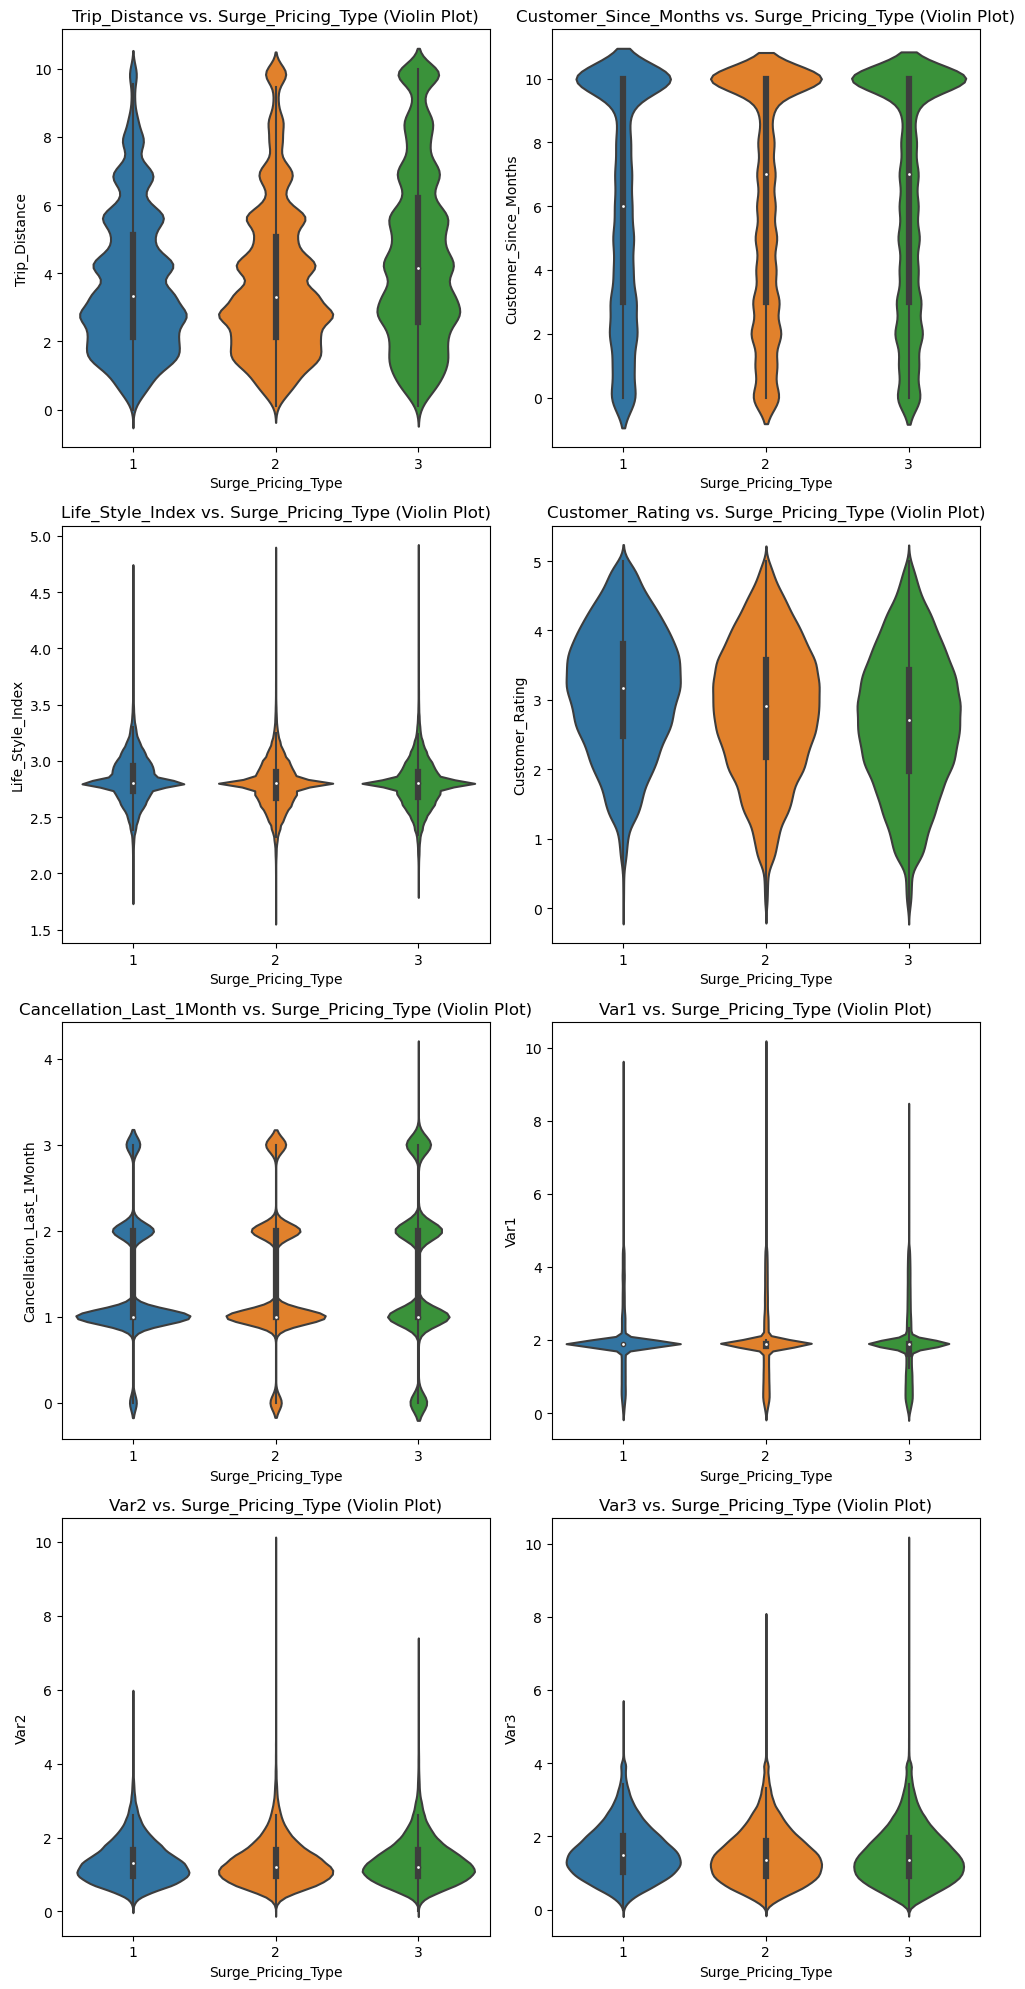

In [855]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

# Flatten the 3x3 array of subplots into a 1D array
axes = axes.flatten()

# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    # Create a violin plot for each feature
    sns.violinplot(x='Surge_Pricing_Type', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Surge_Pricing_Type (Violin Plot)')

# Adjust layout
plt.tight_layout()
plt.show()

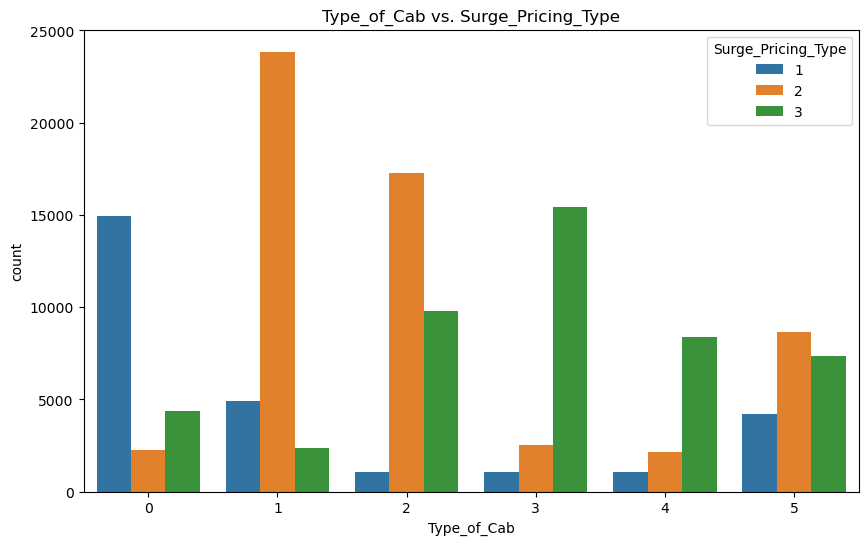

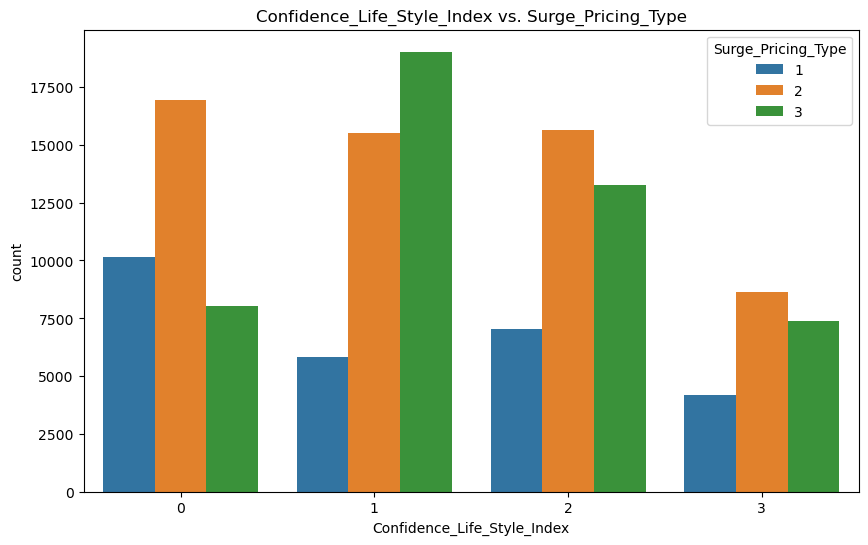

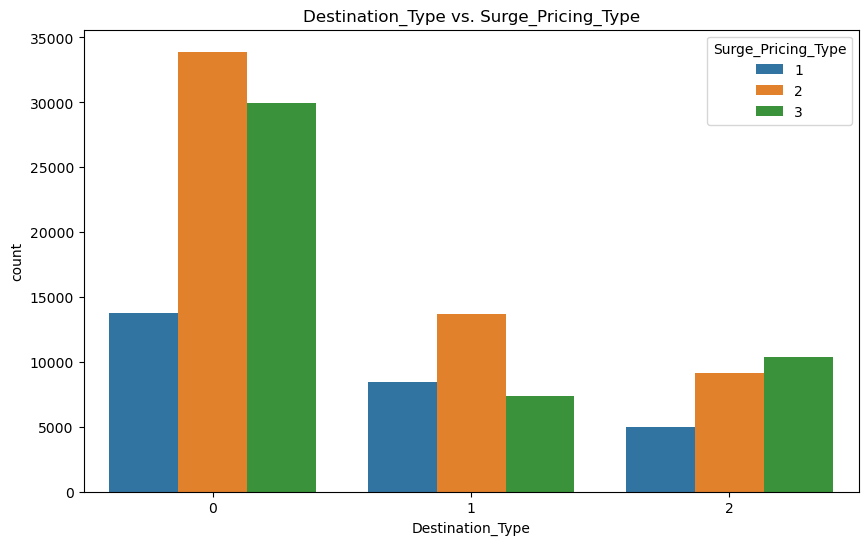

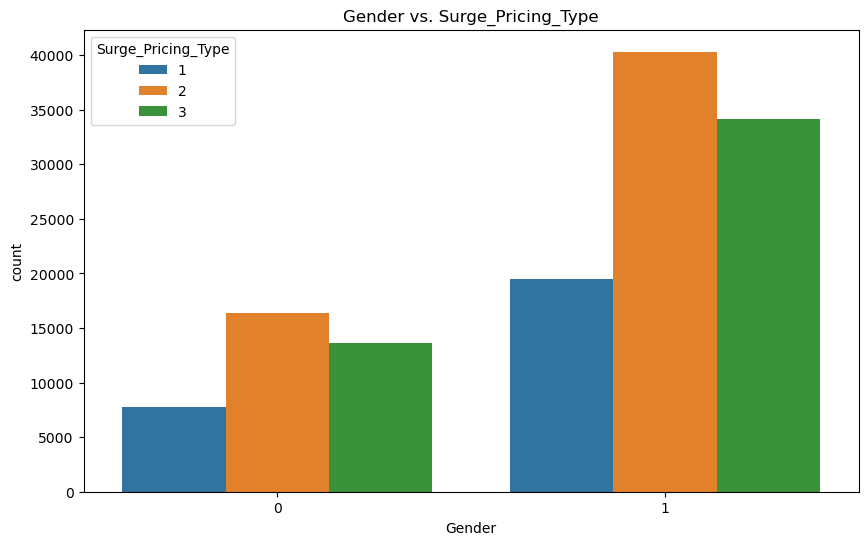

In [856]:
categorical_features = [
    'Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

for feature in categorical_features:

    plt.figure(figsize=(10, 6))

    sns.countplot(x=feature, hue='Surge_Pricing_Type', data=df)

    plt.title(f'{feature} vs. Surge_Pricing_Type')

    plt.show()

In [857]:
df.head()

,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type,Trip_Distance,Var1,Var2,Var3
Trip_ID,,,,,,,,,,,,,
T0005689460,1,1,2.427690,0,0,3.90500,1,0,2,0.593096,0.555556,0.714286,0.519481
T0005689461,1,10,2.782450,1,0,3.45000,1,1,2,2.677194,0.444444,1.904762,1.688312
T0005689464,5,10,2.802064,3,2,3.50125,3,1,2,3.789019,1.900150,1.904762,1.623377
T0005689465,2,10,2.802064,3,0,3.45375,1,1,3,5.623393,1.900150,1.428571,1.428571
T0005689467,2,10,3.034530,1,0,3.40250,0,1,2,5.016526,1.166667,1.071429,3.246753


In [858]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']-1
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  131662 non-null  int32  
 1   Customer_Since_Months        131662 non-null  int32  
 2   Life_Style_Index             131662 non-null  float64
 3   Confidence_Life_Style_Index  131662 non-null  int32  
 4   Destination_Type             131662 non-null  int32  
 5   Customer_Rating              131662 non-null  float64
 6   Cancellation_Last_1Month     131662 non-null  int32  
 7   Gender                       131662 non-null  int32  
 8   Trip_Distance                131662 non-null  float64
 9   Var1                         131662 non-null  float64
 10  Var2                         131662 non-null  float64
 11  Var3                         131662 non-null  float64
dtypes: float64(6), int32(6)
memory usage: 14.1+ MB


In [859]:
X.describe()

,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Trip_Distance,Var1,Var2,Var3
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,2.217337,6.195766,2.802064,1.312968,0.596793,2.849458,1.450958,0.713190,4.029646,1.900150,1.333667,1.499936
std,1.650375,3.639259,0.207760,1.027455,0.782913,0.980675,0.802984,0.452274,2.343269,0.822640,0.593588,0.751836
min,0.000000,0.000000,1.596380,0.000000,0.000000,0.001250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.687952,0.000000,0.000000,2.152500,1.000000,0.000000,2.228241,1.888889,0.952381,0.974026
50%,2.000000,7.000000,2.802064,1.000000,0.000000,2.895000,1.000000,1.000000,3.478700,1.900150,1.190476,1.428571
75%,3.000000,10.000000,2.912815,2.000000,1.000000,3.582500,2.000000,1.000000,5.547191,1.900150,1.666667,1.948052
max,5.000000,10.000000,4.875110,3.000000,2.000000,5.000000,4.000000,1.000000,10.000000,10.000000,10.000000,10.000000


In [860]:
def get_best_k(data, max_k):
    silhouette_scores = []

    for k in tqdm(range(2, max_k + 1), desc="Calculating Silhouette Scores"):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    # Find the k value with the maximum silhouette score
    # Adding 2 because k starts from 2
    best_k = np.argmax(silhouette_scores) + 2
    return best_k


# Example usage
features = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating',
            'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

best_k = get_best_k(X[features], max_k=10)
print(f"The best k value is: {best_k}")

Calculating Silhouette Scores:   0%|          | 0/9 [00:00<?, ?it/s]

Calculating Silhouette Scores: 100%|██████████| 9/9 [56:32<00:00, 376.92s/it]

The best k value is: 2


Feature Combinations:  97%|█████████▋| 64/66 [09:20<00:14,  7.25s/it]C:\Users\ACER\AppData\Local\Temp\ipykernel_5048\3612809536.py:15: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(data[[feature_i, feature_j]])
Feature Combinations:  98%|█████████▊| 65/66 [09:27<00:07,  7.25s/it]C:\Users\ACER\AppData\Local\Temp\ipykernel_5048\3612809536.py:15: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(data[[feature_i, feature_j]])
C:\Users\ACER\AppData\Local\Temp\ipykernel_5048\3612809536.py:15: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(data[[feature_i, feature_j]])
C:\Users\ACER\AppData\Local\Temp\ipykernel_5048\3612809536.py:15: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Poss

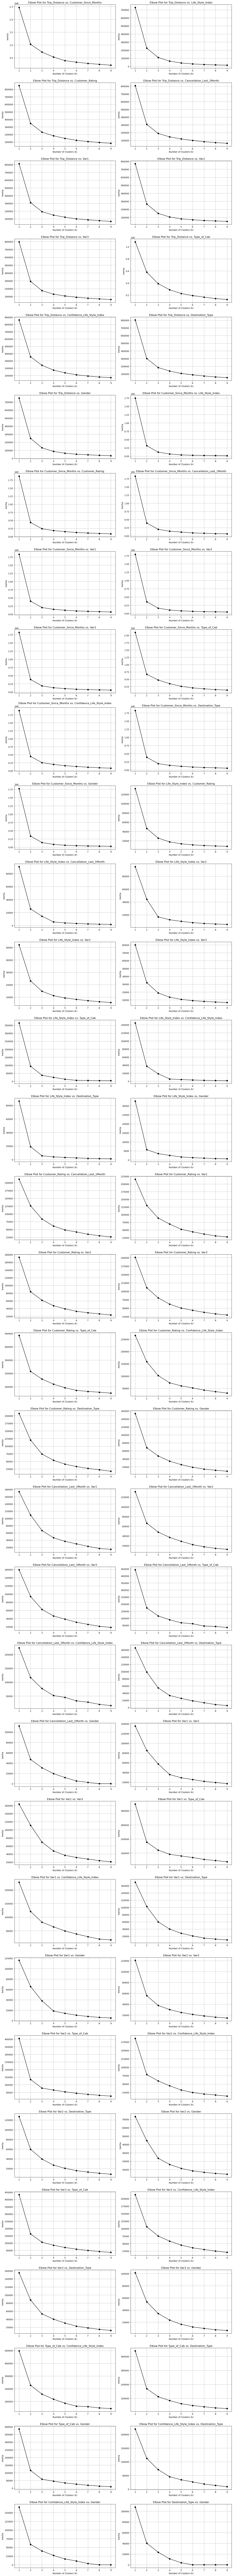

In [861]:
def optimise_k_means_subplot(data, max_k, features):
    feature_combinations = list(combinations(features, 2))

    fig, axes = plt.subplots(nrows=len(feature_combinations)//2, ncols=2, figsize=(
        15, 5*(len(feature_combinations)//2 + len(feature_combinations) % 2)))

    # Use tqdm to create a progress bar for the outer loop
    for (feature_i, feature_j), ax in zip(tqdm(feature_combinations, desc="Feature Combinations"), axes.flatten()):
        means = []
        inertias = []

        for k in range(1, max_k):
            # Set n_init explicitly to suppress the warning
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(data[[feature_i, feature_j]])
            means.append(k)
            inertias.append(kmeans.inertia_)

        ax.plot(means, inertias, '-o', color='black')
        ax.set_title(f'Elbow Plot for {feature_i} vs. {feature_j}')
        ax.set_xlabel('Number of Clusters (k)')
        ax.set_ylabel('Inertia')
        ax.grid(True)

    plt.tight_layout()
    plt.show()


features = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating',
                      'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3','Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']


# Assuming X is your DataFrame and you want to test up to 10 clusters
optimise_k_means_subplot(X, 10, features)

In [868]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X[['Life_Style_Index', 'Var1']])
X['Cluster'] = kmeans.labels_

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


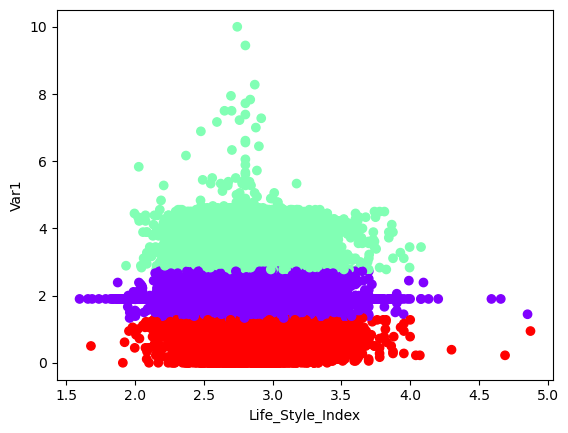

In [869]:
plt.scatter(x=X['Life_Style_Index'], y=X['Var1'],
            c=X['Cluster'], cmap='rainbow')


plt.xlabel('Life_Style_Index')


plt.ylabel('Var1')


plt.show()